# Proyecto Visualización de la Información: Estudiantes de Educación Superior en Chile

**Curso:** CC5208-1 Visualización de Información

**Profesor:** Benjamín Bustos, **Ayudante:** Sebastián A. Saavedra

**Integrantes:** Cristóbal Ardiles, Nicolás Brandstetter, Ignacio Huenchumil y Juan Rodríguez.


Se utiliza los datasets *titulados de educación superior en Chile* del Ministerio de Educación de Chile, el cual se puede encontrar en el siguiente [link]( https://datosabiertos.mineduc.cl/titulados-en-educacion-superior/). Estos dataset contienen información de los titulados de educación superior en Chile por año, desde el 2010 al 2021, de las universidades, institutos profesionales y centros de formación técnica. Se decide utilizar estos dataset ya que se considera que la educación superior es un tema de interés para la sociedad, donde la visualización de datos puede ayudar a tener una mejor comprensión que puede ayudar a la toma de decisiones de los estudiantes que se encuentran en la etapa de elegir una carrera.

## Resumen del dataset

El conjunto de datos se encuentra divido por año, donde cada año contiene un archivo csv con la información de los titulados de ese año. Se importan todos los datos y se unen en un solo dataframe, donde se agrega una columna con el año de cada registro. El dataset contiene las siguientes columnas:


| Variable                  | Tipo    | Descripción                                        |
|---------------------------|---------|----------------------------------------------------|
| CAT_PERIODO               |  Cadena       | Año académico del proceso                          |
| COD_SECTOR                | Cadena        | Código único de la carrera                         |
| MRUN                      |Numérico         | Identificador del estudiante                       |
| GEN_ALU                   | Numérico        | Género del estudiante. 1: Hombre, 2: Mujer         |
| FEC_NAC_ALU               | Numérico        | Fecha de nacimiento del estudiante                  |
| EDAD_ALU                  | Numérico        | Edad del estudiante                                |
| RANGO_EDAD                | Cadena       | Rango de edad del estudiante                       |
| ANO_ING_CARR_ORI          |Numérico         | Año de ingreso a la carrera de origen              |
| SEM_ING_CARR_ORI          | Numérico        | Semestre de ingreso a la carrera de origen         |
| ANO_ING_CARR_ACT          | Numérico        | Año de ingreso a la carrera actual                 |
| SEM_ING_CARR_ACT          | Numérico        | Semestre de ingreso a la carrera actual            |
| NOMB_TITULO_OBTENIDO      | Cadena     | Nombre del título obtenido por el estudiante       |
| NOMB_GRADO_OBTENIDO       | Cadena        | Nombre del grado obtenido por el estudiante        |


## Import data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
path_data = 'data/'
initial_name = '20220804_Titulados_Ed_Superior_'
final_name = '_WEB.csv'
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
data = {}
for year in years:
    path = f"{path_data}{initial_name}{year}{final_name}"
    print(f"leyendo data de año {year}")
    df = pd.read_csv(path,sep=";")
    data[f'df_{year}']=df

leyendo data de año 2010
leyendo data de año 2011
leyendo data de año 2012
leyendo data de año 2013
leyendo data de año 2014
leyendo data de año 2015
leyendo data de año 2016
leyendo data de año 2017
leyendo data de año 2018
leyendo data de año 2019
leyendo data de año 2020
leyendo data de año 2021


## Un solo gran dataframe

In [5]:
big_data = pd.concat([df for df in data.values()], ignore_index=1)
big_data.head()

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,...,jornada,modalidad,version,tipo_plan_carr,area_cineunesco,area_cine_f_97,subarea_cine_f_97,area_cine_f_13,subarea_cine_f_13,area_carrera_generica_n
0,2010,I81S21C16J2V1,256.0,1,196801,40 y más años,2005,1,NaN,NaN,...,Vespertino,Presencial,1.0,Plan Regular,Educación,Educación,Formación de Personal Docente y Ciencias de la...,Educación,Educación,Pedagogía en Educación Básica
1,2010,I111S2C21J2V1,503.0,2,198106,25 a 29 Años,9998,1,2008.0,1.0,...,Vespertino,Presencial,1.0,Plan Regular,Tecnología,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,Técnico en Construcción y Obras Civiles
2,2010,I143T2010N12,621.0,2,198503,25 a 29 Años,2005,1,NaN,1.0,...,Vespertino,Presencial,NaN,Plan Regular,Tecnología,Ciencias,Informática,Tecnología de la Información y la Comunicación...,Tecnología de la Información y la Comunicación...,Ingeniería en Computación e Informática
3,2010,I143S8C36J1V1,622.0,2,198501,25 a 29 Años,2008,1,NaN,1.0,...,Diurno,Presencial,1.0,Plan Regular,Salud,Salud y Servicios Sociales,Medicina,Salud y Bienestar,Salud,Técnico en Enfermería
4,2010,I86S1C29J1V1,627.0,1,198603,20 a 24 Años,2004,1,NaN,NaN,...,Diurno,Presencial,1.0,Plan Regular,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Administración de Empresas y Derecho,Derecho,Derecho


In [6]:
data["df_2010"].columns == big_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [3]:
data['df_2020'].modalidad.value_counts()

Presencial        172536
No Presencial      19347
Semipresencial      9840
Name: modalidad, dtype: int64

## Analisis Exploratorio

In [7]:
data['df_2010'].head()

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,...,jornada,modalidad,version,tipo_plan_carr,area_cineunesco,area_cine_f_97,subarea_cine_f_97,area_cine_f_13,subarea_cine_f_13,area_carrera_generica_n
0,2010,I81S21C16J2V1,256.0,1,196801,40 y más años,2005,1,NaN,NaN,...,Vespertino,Presencial,1.0,Plan Regular,Educación,Educación,Formación de Personal Docente y Ciencias de la...,Educación,Educación,Pedagogía en Educación Básica
1,2010,I111S2C21J2V1,503.0,2,198106,25 a 29 Años,9998,1,2008.0,1.0,...,Vespertino,Presencial,1.0,Plan Regular,Tecnología,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,Técnico en Construcción y Obras Civiles
2,2010,I143T2010N12,621.0,2,198503,25 a 29 Años,2005,1,NaN,1.0,...,Vespertino,Presencial,NaN,Plan Regular,Tecnología,Ciencias,Informática,Tecnología de la Información y la Comunicación...,Tecnología de la Información y la Comunicación...,Ingeniería en Computación e Informática
3,2010,I143S8C36J1V1,622.0,2,198501,25 a 29 Años,2008,1,NaN,1.0,...,Diurno,Presencial,1.0,Plan Regular,Salud,Salud y Servicios Sociales,Medicina,Salud y Bienestar,Salud,Técnico en Enfermería
4,2010,I86S1C29J1V1,627.0,1,198603,20 a 24 Años,2004,1,NaN,NaN,...,Diurno,Presencial,1.0,Plan Regular,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Administración de Empresas y Derecho,Derecho,Derecho


## Tipos de datos

In [9]:
## Despleguemos las columnas y sus tipos
big_data.dtypes

cat_periodo                  int64
codigo_unico                object
mrun                       float64
gen_alu                      int64
fec_nac_alu                  int64
rango_edad                  object
anio_ing_carr_ori            int64
sem_ing_carr_ori             int64
anio_ing_carr_act          float64
sem_ing_carr_act           float64
nomb_titulo_obtenido        object
nomb_grado_obtenido         object
fecha_obtencion_titulo       int64
tipo_inst_1                 object
tipo_inst_2                 object
tipo_inst_3                 object
cod_inst                     int64
nomb_inst                   object
cod_sede                   float64
nomb_sede                   object
cod_carrera                float64
nomb_carrera                object
nivel_global                object
nivel_carrera_1             object
nivel_carrera_2             object
dur_estudio_carr           float64
dur_proceso_tit            float64
dur_total_carr             float64
region_sede         

### Variables ordinales 

Las siguientes variables corresponen a variables ordinales:

- Discreta
    - `cat_periodo`: Año del proceso
    - `codigo_unico`: Codigo de carrera
    - `fec_nac_alu`: fecha de nacimiento del alumno
    - `ano_ing_carr_ori`: 
    - `ano_ing_carr_act`:
    - `fecha_obtencion_titulo`
    - `dur_estudio_carr`
    - `dur_proceso_tit`
    - `version`
- Continua


### Variables nominales

Las siguientes corresponden a variables nominales:

- Categórica
    - `gen_alu`: género del alumno (*)
    - `rango_edad`: rango de edad al que pertenece el estudiante
    - `sem_ing_carr_ori` (*)
    - `sem_ing_carr_act` (*)
    - `tipo_inst_1`
    - `tipo_inst_2`
    - `tipo_inst_3`
    - `nivel_global`
    - `nivel_carrera_1`
    - `nivel_carrera_2`
    - `region_sede`
    - `provincia_sede`
    - `comuna_sede`
    - `jornada`
    - `modalidad`
    - `tipo_plan_carr`
    - `area_cineunesco`
    - `area_cine_f_97`
    - `subarea_cine_f_97`
    - `area_cine_f_13`
    - `subarea_cine_f_13`
    - `area_carrera_generica_n`
- Rankeada
- Arbitraria
    - `Codigo Único`
    - `mrun`
    - `nomb_titulo_obtenido`
    - `nomb_grado_obtenido`
    - `cod_inst`
    - `nomb_inst`
    - `cod_sede`
    - `nomb_sede`
    - `cod_carrera`
    - `nomb_carrera`
    

## Datos faltantes

In [24]:
big_data.count()

cat_periodo                2445761
codigo_unico               2445761
mrun                       2441076
gen_alu                    2445761
fec_nac_alu                2445761
rango_edad                 2445761
anio_ing_carr_ori          2445761
sem_ing_carr_ori           2445761
anio_ing_carr_act          1419878
sem_ing_carr_act           1443790
nomb_titulo_obtenido       2196898
nomb_grado_obtenido         973860
fecha_obtencion_titulo     2445761
tipo_inst_1                2445761
tipo_inst_2                2445761
tipo_inst_3                2445761
cod_inst                   2445761
nomb_inst                  2445761
cod_sede                   2445063
nomb_sede                  2445761
cod_carrera                2355678
nomb_carrera               2445761
nivel_global               2445761
nivel_carrera_1            2445761
nivel_carrera_2            2445761
dur_estudio_carr           2445515
dur_proceso_tit            2444964
dur_total_carr             2445515
region_sede         

In [25]:
# Porcentaje de Datos nulos para todo el dataset
null_values = big_data.isna().sum()
total_count = big_data.isna().count()

print(null_values / total_count * 100)

cat_periodo                 0.000000
codigo_unico                0.000000
mrun                        0.191556
gen_alu                     0.000000
fec_nac_alu                 0.000000
rango_edad                  0.000000
anio_ing_carr_ori           0.000000
sem_ing_carr_ori            0.000000
anio_ing_carr_act          41.945350
sem_ing_carr_act           40.967658
nomb_titulo_obtenido       10.175279
nomb_grado_obtenido        60.181718
fecha_obtencion_titulo      0.000000
tipo_inst_1                 0.000000
tipo_inst_2                 0.000000
tipo_inst_3                 0.000000
cod_inst                    0.000000
nomb_inst                   0.000000
cod_sede                    0.028539
nomb_sede                   0.000000
cod_carrera                 3.683230
nomb_carrera                0.000000
nivel_global                0.000000
nivel_carrera_1             0.000000
nivel_carrera_2             0.000000
dur_estudio_carr            0.010058
dur_proceso_tit             0.032587
d

### Filas con valor "sin informacion"


In [28]:
## Columna "fec_nac_alu"
placeholder = 190001
len(big_data[big_data["fec_nac_alu"] == placeholder])

940

In [29]:
## Columna "año_ing_carr_ori"
placeholder = 9995
len(big_data[big_data["anio_ing_carr_ori"] == placeholder])

0

In [ ]:
## 

In [10]:
big_data.nivel_carrera_1.unique()

array(['Profesional Con Licenciatura', 'Técnico de Nivel Superior',
       'Profesional Sin Licenciatura',
       'Diplomado (superior a un semestre)', 'Magister', 'Postítulo',
       'Licenciatura No Conducente a Título',
       'Especialidad Médica U Odontológica', 'Doctorado'], dtype=object)

Corroborando que todos los dataframes tengan las mismas columnas con los mismos nombres

In [5]:
columnas_primer_df = list(data.values())[0].columns

for df in list(data.values())[1:]:
    if df.columns.tolist() != columnas_primer_df.tolist():
        print("Los DataFrames no tienen las mismas columnas.")
        break
else:
    print("Todos los DataFrames tienen las mismas columnas.")

Todos los DataFrames tienen las mismas columnas.


In [6]:
%%capture
# Listado de columnas
for col in columnas_primer_df:
    print(f"{col}: \n")

In [7]:
print(f'Cantidad de columnas: {len(columnas_primer_df)}')

Cantidad de columnas: 41


In [8]:
(data['df_2010'].area_cine_f_97.unique())

array(['Educación', 'Ingeniería, Industria y Construcción', 'Ciencias',
       'Salud y Servicios Sociales',
       'Ciencias Sociales, Enseñanza Comercial y Derecho', 'Servicios',
       'Agricultura', 'Humanidades y Artes'], dtype=object)

In [9]:
%%capture
(data['df_2010'].area_carrera_generica_n.unique())

In [10]:
data['df_2010'].columns

Index(['cat_periodo', 'codigo_unico', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'nomb_titulo_obtenido',
       'nomb_grado_obtenido', 'fecha_obtencion_titulo', 'tipo_inst_1',
       'tipo_inst_2', 'tipo_inst_3', 'cod_inst', 'nomb_inst', 'cod_sede',
       'nomb_sede', 'cod_carrera', 'nomb_carrera', 'nivel_global',
       'nivel_carrera_1', 'nivel_carrera_2', 'dur_estudio_carr',
       'dur_proceso_tit', 'dur_total_carr', 'region_sede', 'provincia_sede',
       'comuna_sede', 'jornada', 'modalidad', 'version', 'tipo_plan_carr',
       'area_cineunesco', 'area_cine_f_97', 'subarea_cine_f_97',
       'area_cine_f_13', 'subarea_cine_f_13', 'area_carrera_generica_n'],
      dtype='object')

In [11]:
(data['df_2010'].area_cineunesco.unique())

array(['Educación', 'Tecnología', 'Salud', 'Derecho', 'Ciencias Básicas',
       'Ciencias Sociales', 'Administración y Comercio',
       'Arte y Arquitectura', 'Agropecuaria', 'Humanidades'], dtype=object)

In [12]:
# Se eliminan las columnas con información no relevante.
for df in data.values():
    df.drop("tipo_inst_2", axis=1, inplace=True)
    df.drop("tipo_inst_3", axis=1, inplace=True)
    df.drop("version", axis=1, inplace=True)

In [13]:
# ver si se eliminan gabriela mistral y formacion tecnica INFOMED

In [14]:
df_final = pd.DataFrame()
for key, df in data.items():
    df_final = pd.concat([df_final, df], ignore_index=True)

In [17]:
df_tipo_edu = pd.DataFrame()
for year in df_final.cat_periodo.unique():
    # Se crea un diccionario con la cantidad de titulados por nivel de educación para cada año.
    data_year = df_final[df_final['cat_periodo']==int(year)]['nivel_carrera_2'].value_counts().to_dict()
    # Se crea un DataFrame para almacenar la información.
    df_tipo_edu = pd.concat([df_tipo_edu,pd.DataFrame(data_year, index=[int(year)])], ignore_index=False)
# cambiar los nombres de las columnas
df_tipo_edu.columns = ['Profesional', 'Tecnica', 'Postitulo', 'Magister', 'Doctorado']
df_tipo_edu.columns

Index(['Profesional', 'Tecnica', 'Postitulo', 'Magister', 'Doctorado'], dtype='object')

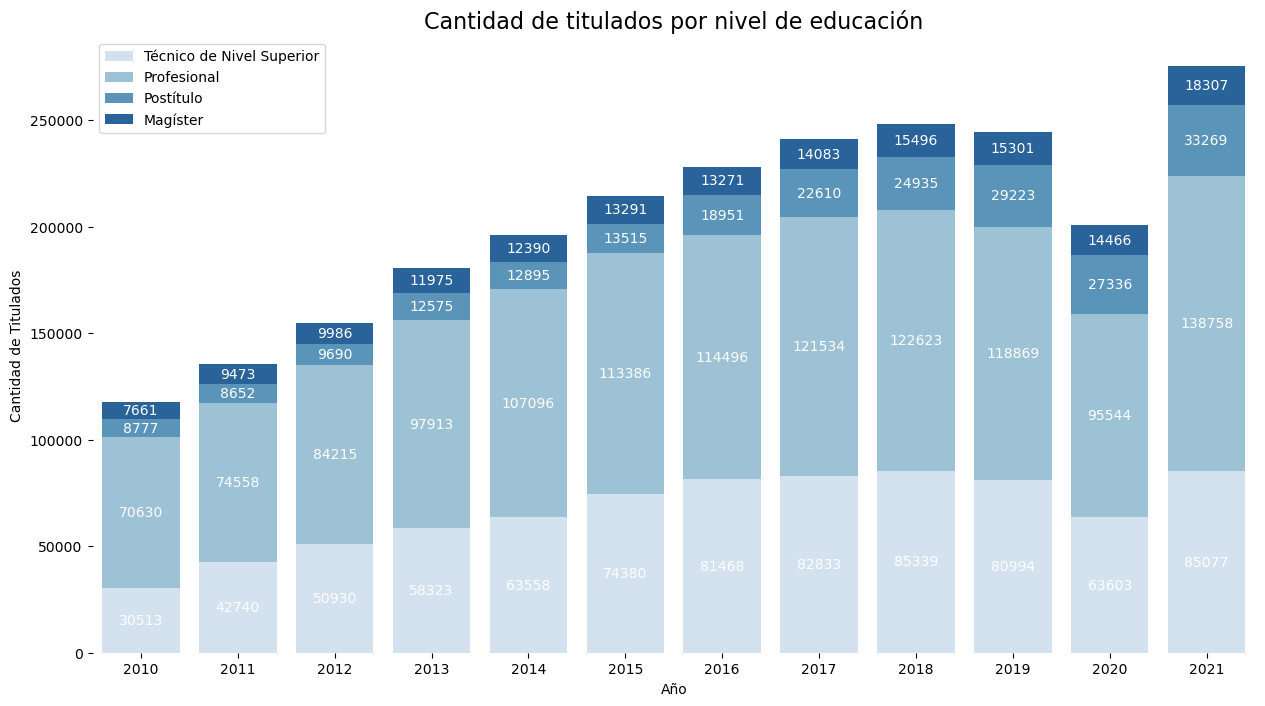

In [18]:
#normalizar para probar
# df_tipo_edu = df_tipo_edu.div(df_tipo_edu.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(15, 8))

# Se define una paleta de colores para los gráficos. Se utiliza la paleta "Blues" de seaborn con 5 tonalidades.
colors = sns.color_palette("Blues", n_colors=4)

sns.barplot(x=df_tipo_edu.index, y=df_tipo_edu['Tecnica'], label="Técnico de Nivel Superior",
            color=colors[0])

sns.barplot(x=df_tipo_edu.index, y=df_tipo_edu['Profesional'], label="Profesional",
            color=colors[1], bottom=df_tipo_edu['Tecnica'])

sns.barplot(x=df_tipo_edu.index, y=df_tipo_edu['Postitulo'], label="Postítulo",
            color=colors[2], bottom=df_tipo_edu['Profesional'] + df_tipo_edu['Tecnica'])

sns.barplot(x=df_tipo_edu.index, y=df_tipo_edu['Magister'], label="Magíster",
            color=colors[3], bottom=df_tipo_edu['Profesional'] + df_tipo_edu['Tecnica'] + df_tipo_edu['Postitulo'])

# Se pueden despreciar los datos de doctorado, ya que son muy pocos. Por revisar.
# sns.barplot(x=df_tipo_edu.index, y=df_tipo_edu['Doctorado'], label="Doctorado",
#             color=colors[4], bottom=df_tipo_edu['Profesional'] + df_tipo_edu['Tecnica'] + df_tipo_edu['Postitulo'] + df_tipo_edu['Magister'])

for bar in ax.containers:
    ax.bar_label(bar, label_type='center', color = 'white')

ax.legend(loc='upper left')
sns.despine(left=True, bottom=True)
ax.set_title("Cantidad de titulados por nivel de educación", fontsize=16)
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de Titulados")
plt.show()

# Se observa una caida por las fechas de la pandemia.

In [19]:
# Se busca graficar el tipo de estudio por región de los matriculados por año en los primeros niveles de educación superior: técnico y profesional.
df_final[['gen_alu', 'region_sede', 'tipo_inst_1', 'nivel_carrera_2', 'cat_periodo']]
df_final.tipo_inst_1.unique()

array(['Universidades', 'Institutos Profesionales',
       'Centros de Formación Técnica'], dtype=object)

In [20]:
# Contiene la cantidad de titulados por año, región y nivel de educación (Profesional, Tecnico).
df_region_all = df_final.groupby(['cat_periodo','region_sede','nivel_carrera_2']).size().reset_index(name='counts')
df_region_all = df_region_all[(df_region_all['nivel_carrera_2'] == 'Carreras Profesionales') | (df_region_all['nivel_carrera_2'] == 'Carreras Técnicas')]
df_region_all[df_region_all['region_sede']=='Metropolitana'].counts.sum()
df_region_all.head()

,cat_periodo,region_sede,nivel_carrera_2,counts
0,2010,Antofagasta,Carreras Profesionales,2692
1,2010,Antofagasta,Carreras Técnicas,1031
5,2010,Arica y Parinacota,Carreras Profesionales,1235
6,2010,Arica y Parinacota,Carreras Técnicas,371
10,2010,Atacama,Carreras Profesionales,611


Text(0, 0.5, 'Región')

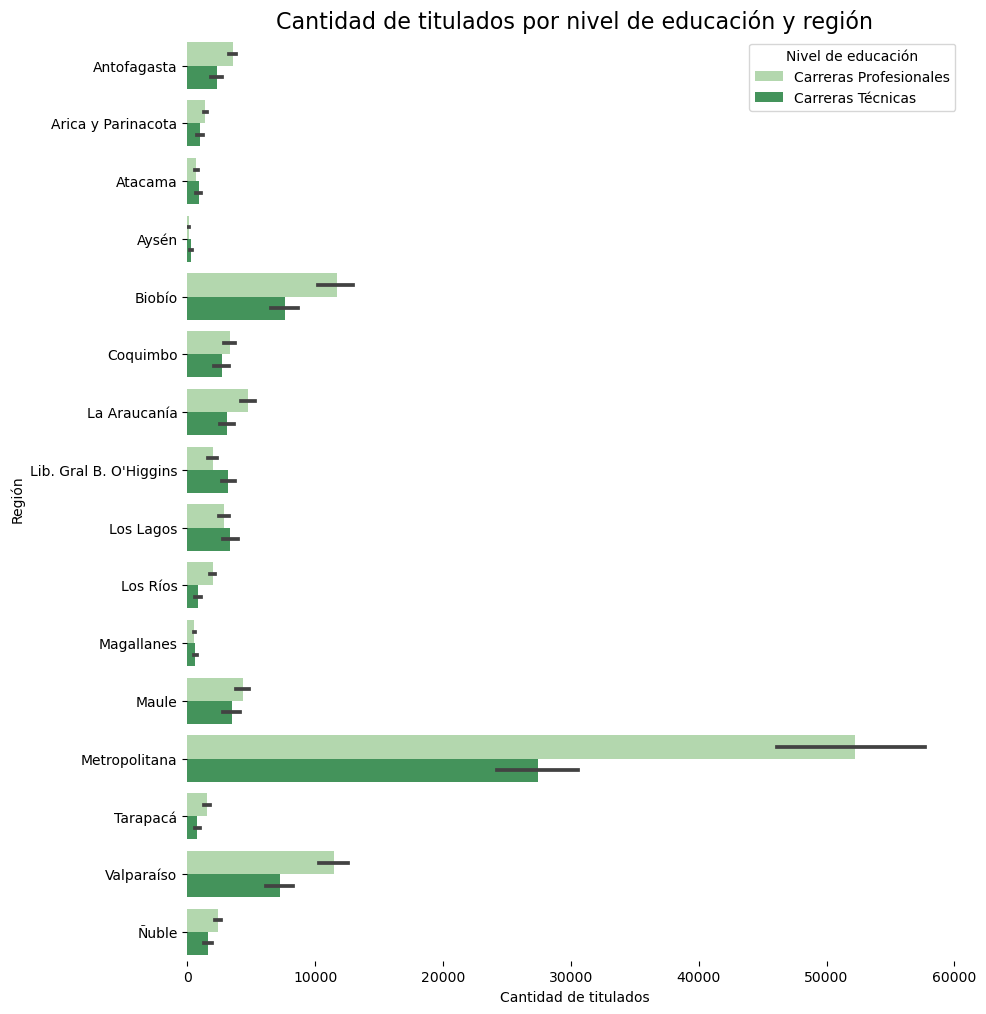

In [21]:
fig, ax = plt.subplots(figsize=(10, 12))

# Paleta de contraste de verdes
green_color = sns.color_palette("Greens", n_colors=2)

# Se filtra por el año 2019
df_region_2019 = df_region_all[df_region_all['cat_periodo']==2019]
# sns.barplot(x=df_region_2019['counts'], y=df_region_2019['region_sede'], hue=df_region_2019['nivel_carrera_2'], palette=green_color)

# Se grafica la cantidad de titulados por año, región y nivel de educación.
sns.barplot(x=df_region_all['counts'], y=df_region_all['region_sede'], hue=df_region_all['nivel_carrera_2'], palette=green_color)

# Configuraciones adicionales
sns.despine(left=True, bottom=True)
ax.set_title("Cantidad de titulados por nivel de educación y región", fontsize=16)
ax.set_xlabel("Cantidad de titulados")
ax.legend(loc='upper right', title="Nivel de educación")
ax.set_ylabel("Región")

In [22]:
# estudios vespertino y diurno comparar 

## matriz de correlacion

C:\Users\Ignacio\AppData\Local\Temp\ipykernel_22692\4075831077.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True, fmt='.1f', cmap="coolwarm", ax=ax)


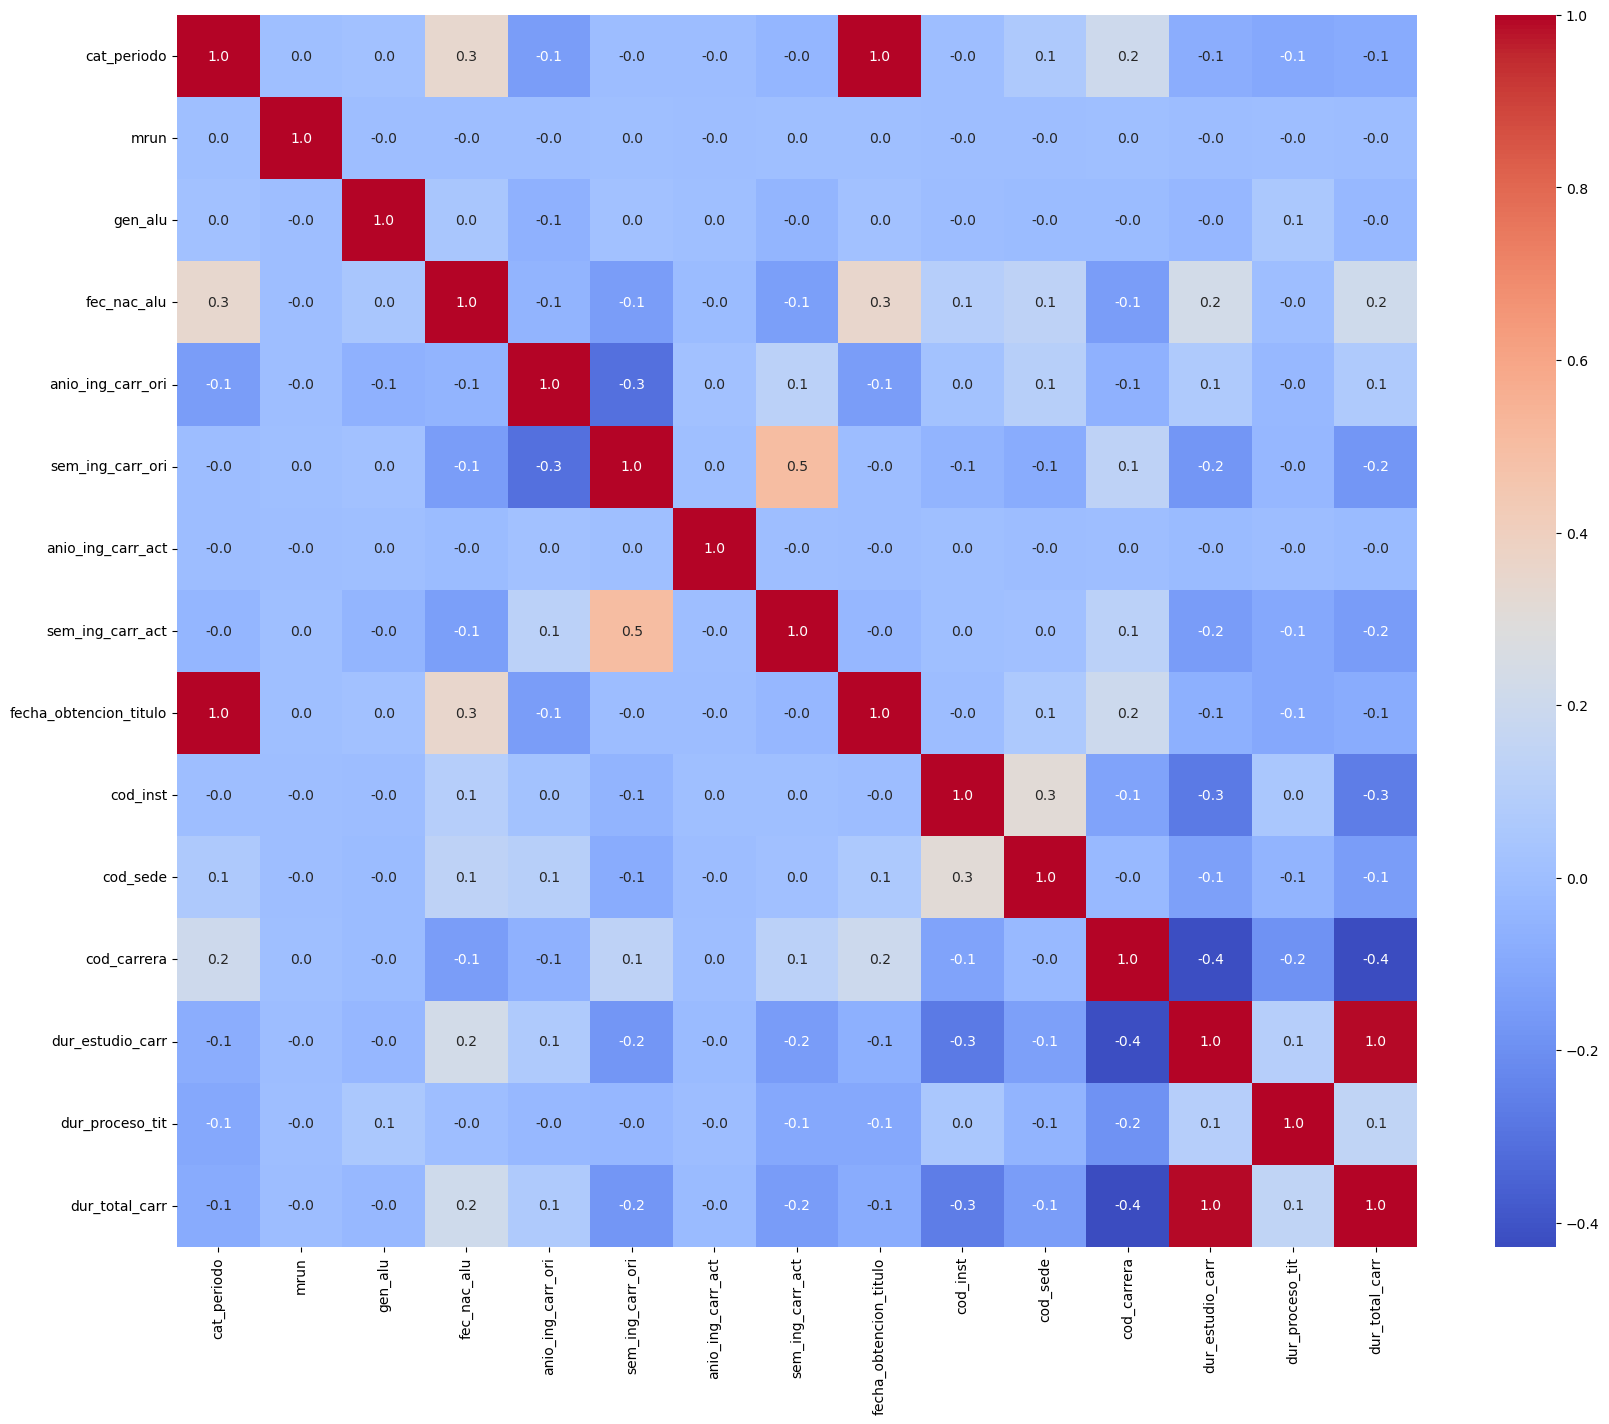

In [23]:
# Crear una figura con un tamaño de 10 x 8 pulgadas
fig, ax = plt.subplots(figsize=(20, 16))
# Crear el mapa de calor en la figura especificada
sns.heatmap(df_final.corr(), annot=True, fmt='.1f', cmap="coolwarm", ax=ax)

# Mostrar el gráfico
plt.show()

# Variación en el tiempo del rango etario según distintos tipos de instituciones

In [24]:
# Cantidad de tipos de instituciones
tipos_instituciones = df_final['tipo_inst_1'].unique()
print(f"Cantidad de tipos de instituciones: {tipos_instituciones}")

# Numero de instituciones por tipo

for tipo in tipos_instituciones:
    print(f"Hay {len(df_final[df_final['tipo_inst_1']==tipo]['nomb_carrera'].unique())} de tipo \"{tipo}\"")

Cantidad de tipos de instituciones: ['Universidades' 'Institutos Profesionales' 'Centros de Formación Técnica']
Hay 9731 de tipo "Universidades"
Hay 1380 de tipo "Institutos Profesionales"
Hay 824 de tipo "Centros de Formación Técnica"


In [25]:
# universidad
df_uni = df_final[df_final['tipo_inst_1']=="Universidades"]

counts_df_uni = pd.pivot_table(df_uni, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()

counts_df_uni.head()

,rango_edad,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,15 a 19 Años,28,32,14,54,51,85,87,184,146,103,172,188
1,20 a 24 Años,24785,26417,30896,34658,36898,37012,36461,38240,38052,37846,29558,43270
2,25 a 29 Años,30230,30410,32977,37897,41010,42754,43614,47622,47969,46982,37620,55223
3,30 a 34 Años,10582,10955,11973,14538,15681,16480,17736,19089,20803,21713,19790,25031
4,35 a 39 Años,6131,6101,6807,8000,8208,8791,9498,10613,11981,12977,11982,15273


## Mapa de calor para ver tendencias por tipo

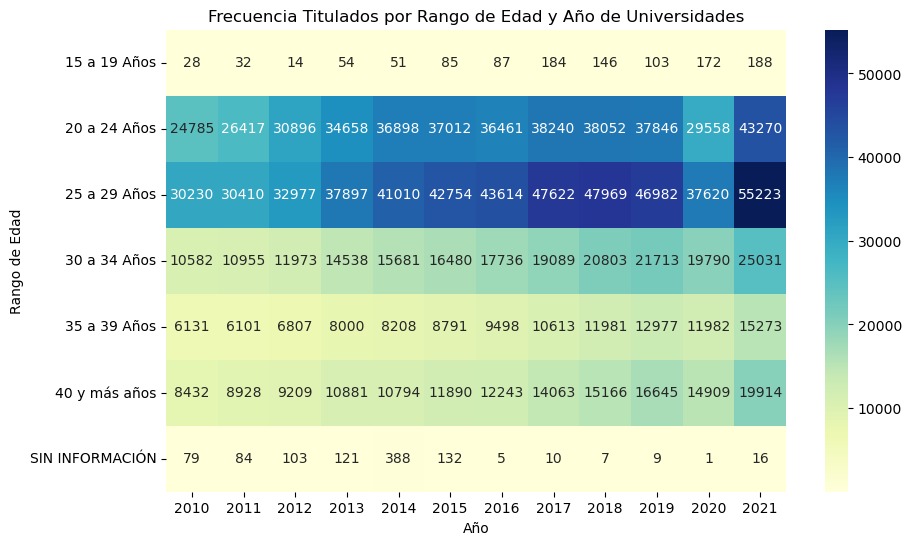

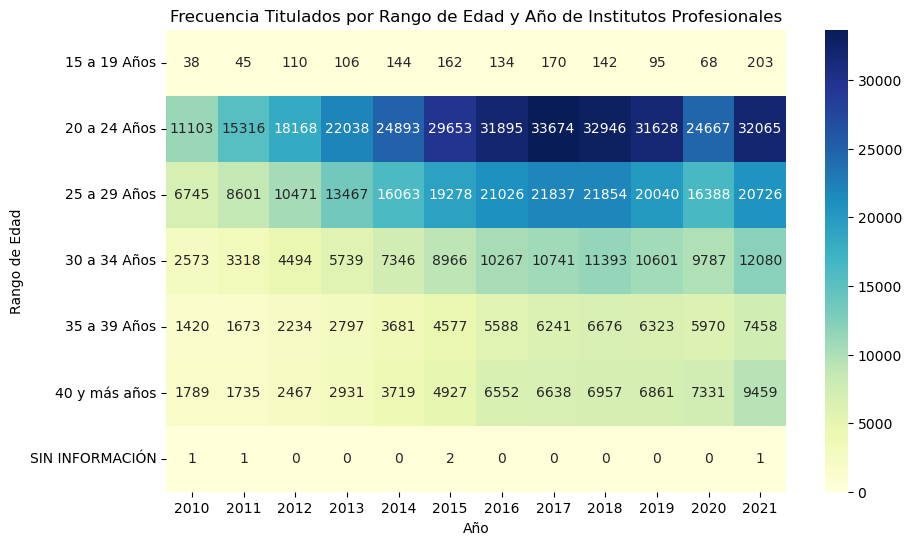

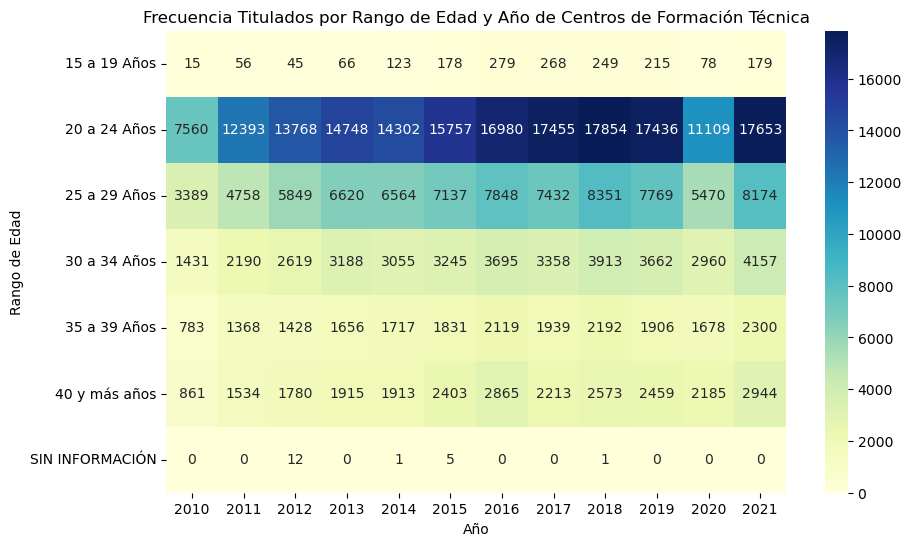

In [26]:
for tipo in tipos_instituciones:
    df = df_final[df_final['tipo_inst_1']==tipo]
    counts_df = pd.pivot_table(df, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()
    # Crea el mapa de calor
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    sns.heatmap(counts_df.set_index('rango_edad'), cmap='YlGnBu', annot=True, fmt='d', cbar=True)

    # Personaliza el mapa de calor
    plt.title(f'Frecuencia Titulados por Rango de Edad y Año de {tipo}')  # Título del gráfico
    plt.xlabel('Año')  # Etiqueta del eje x
    plt.ylabel('Rango de Edad')  # Etiqueta del eje y

    # Muestra el mapa de calor
    plt.show()

## Mapa de calor para ver tendencias globales comparando los 3 tipos de instituciones

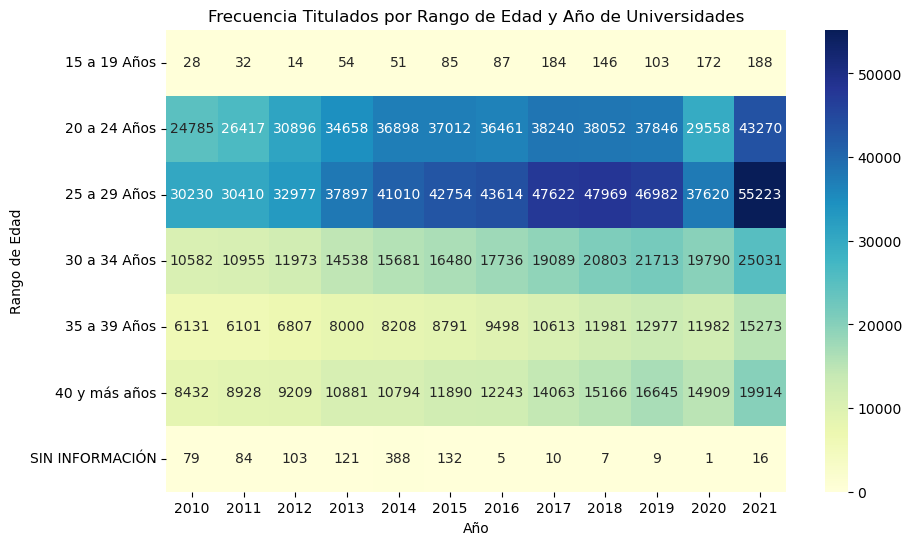

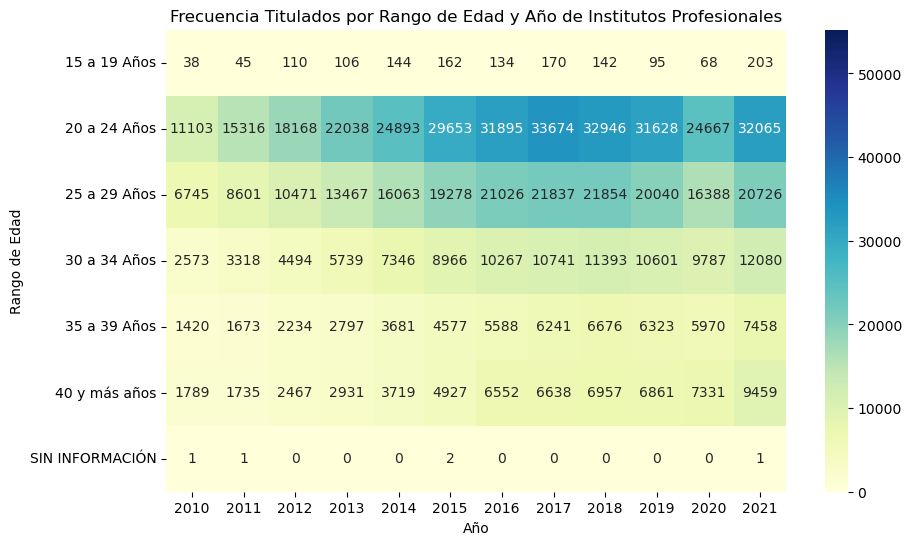

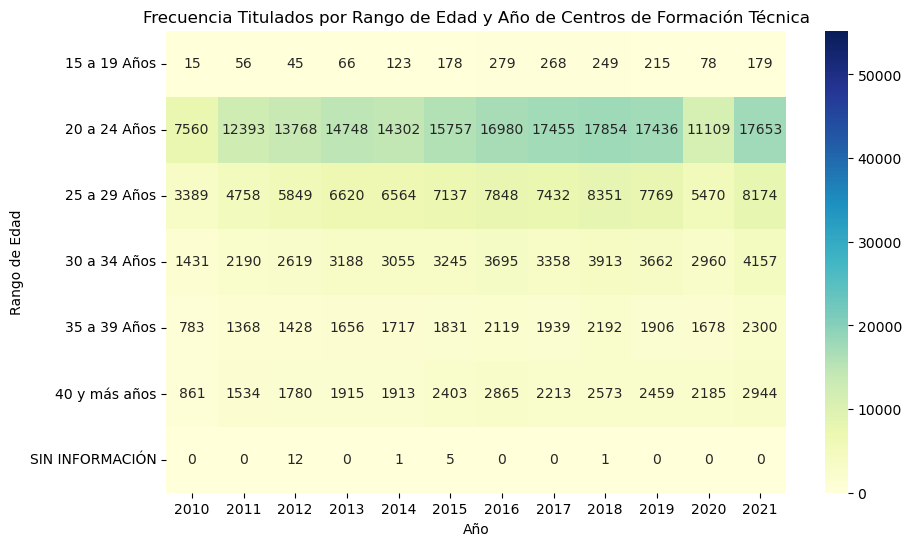

In [27]:
# Inicializa los mínimos y máximos globales con valores extremos
min_global = float('inf')
max_global = float('-inf')

# Itera sobre los tipos de instituciones
for tipo in tipos_instituciones:
    df = df_final[df_final['tipo_inst_1'] == tipo]
    counts_df = pd.pivot_table(df, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()

    # Actualiza los mínimos y máximos globales
    min_val = counts_df.iloc[:, 1:].values.min()
    max_val = counts_df.iloc[:, 1:].values.max()
    min_global = min(min_global, min_val)
    max_global = max(max_global, max_val)

# Itera nuevamente sobre los tipos de instituciones para generar los mapas de calor con la escala común
for tipo in tipos_instituciones:
    df = df_final[df_final['tipo_inst_1']==tipo]
    counts_df = pd.pivot_table(df, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()
    # Crea el mapa de calor con la escala común
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    sns.heatmap(counts_df.set_index('rango_edad'), cmap='YlGnBu', annot=True, fmt='d', cbar=True, vmin=min_global, vmax=max_global)

    # Personaliza el mapa de calor
    plt.title(f'Frecuencia Titulados por Rango de Edad y Año de {tipo}')  # Título del gráfico
    plt.xlabel('Año')  # Etiqueta del eje x
    plt.ylabel('Rango de Edad')  # Etiqueta del eje y

    # Muestra el mapa de calor
    plt.show()

## Analisis
Se destaca que en el año 2020 hubo un descenso considerable de titulados en los 3 tipos de instituciones

## Efecto de la pandemia.

In [28]:
%%capture
# Atributos a considerar
df_final[['year','rango_edad','gen_alu','nomb_carrera','region_sede','anio_ing_carr_ori', 'modalidad', 'nivel_carrera_1','nivel_carrera_2', 'subarea_cine_f_13', 'nomb_inst']]

KeyError: "['year'] not in index"